# Exam - Coding part (worth 34 points)

### Please upload to the Moodle page the notebook containing your solutions

**Q2. (9 points):** Write a function with the signature: `find_sum_subarray(A, k)`
The function should find the longest contiguous subarray of a tuple of integers A that adds up to a given integer k.
If no such subarray exists, then the function should return `None`.

For instance, with:

A = (1, 2, 3, -1, 4, 2, -2, 1, 1) and k = 6,

the function should return (3, -1, 4, 2, -2).

In [109]:
def find_sum_subarray(A, k):
    # your code goes here
    n = len(A)
    maxlen = 0
    res = None

    for i in range(n):
        currentsum = 0
        for j in range(i, n):
            currentsum += A[j]
            if currentsum == k:
                if (j - i + 1) > maxlen:
                    maxlen = j - i + 1
                    res = A[i:j+1]
    return res

In [110]:
## Test your code by running this cell:
assert find_sum_subarray((1,2,3,-1,4,2,-2,1,1), 6) == (3,-1,4,2,-2)
assert find_sum_subarray((4, 5, -2, 1, 0, 5), 9) == (5,-2,1,0,5)
assert find_sum_subarray((4, 5, -2, 1, 0, 4), 9) == (4, 5)
assert find_sum_subarray((4, 4, 5), 16) == None

print(find_sum_subarray(A, k))
A = (1, 2, 3, -1, 4, 2, -2, 1, 1)
k = 6

(3, -1, 4, 2, -2)


**Q2. (9 points):** Simulate a simple random walk on a square matrix.

A random walk starts at the center of an n x n matrix. At each step, you can move North, South, East, or West with equal probability (hint: you could use random.choice). You may assume that n is an odd number (if not, just add 1 to n and use that number.

The walk stops if it reaches the border of the matrix (i.e., the top row, bottom row, leftmost column, or rightmost column).

Tasks
- (5 points) Write a function random_walk(n) that simulates a random walk starting at the center of an n x n matrix. The function should return the number of steps taken until the walk reaches the matrix border.
- (2 points) Simulate the walk 1000 times with n=21, saving the number of steps each walk takes.
- (2 points) Use the plt.hist() function from matplotlib (import matplotlib.pyplot as plt) to visualize the distances.


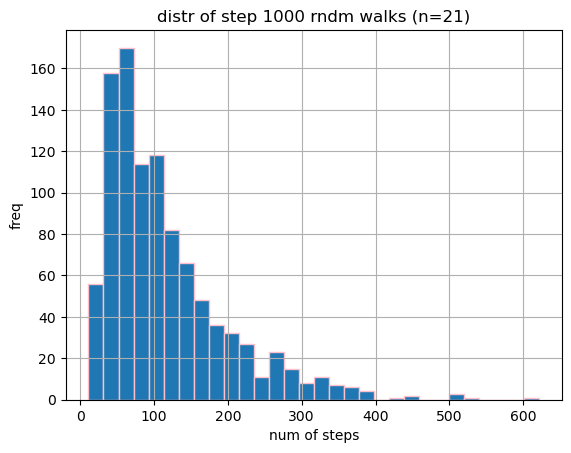

In [ ]:
import random
from matplotlib import pyplot as plt

def random_walk(n):
    if n % 2 == 0:
        n += 1
        # your code goes here
    x = y = n // 2
    steps = 0
    while 0 < x < n-1 and 0 < y < n-1:
        direction = random.choice(['N', 'S', 'E', 'W']) #we are mobving north, south, east, west

        if direction == 'N':
            y -= 1
        elif direction == 'S':
            y += 1
        elif direction == 'E':
            x += 1
        elif direction == 'W':
            x -= 1       
        steps += 1
    return steps-1
# perform the simulations and plot the histogram
def simulation(n=21, ntimes=1000):
    lens = [random_walk(n) for _ in range(ntimes)]
    
    plt.hist(lens, bins=30, edgecolor='pink')
    plt.xlabel('num of steps')
    plt.ylabel('freq')
    plt.title(f'distr of step {ntimes} rndm walks (n={n})')
    plt.grid(True)
    plt.show()
simulation()



**Q3. (9 points):** Consider the following problem on the stack data type.
Tasks
- (5 points) Complete the missing code in the `Stack` class below
- (4 points) Write a function called `reverse_stack(stack)` which takes a stack, and generates a new stack from it in which all the items are in reversed order (the item that was on the top of the original stack will now be on the bottom of the new stack, and vice versa)


In [112]:
class StackNode:
    def __init__(self, contents=None, next_node=None):
        # set all the data fields you need here...
        self.contents = contents
        self.next_node = next_node    
        
    def __str__(self):
        return f"StackNode({self.contents})"
    def __eq__(self, other):
        return self.contents == other.contents
    
class Stack:
    def __init__(self):
        self.top_node = None
        # fill this out with something reasonable for an empty stack

    def pop(self):
        if not self.top_node:
            return None
        popped_node = self.top_node
        self.top_node = self.top_node.next_node
        popped_node.next_node = None
        return popped_node.contents
        
        # return top_node but make sure that:
        # - new top node is now the one that used to be the second one
        # - before returning the top node, it's a good idea to set its next_node to None, since the relationships
        # within the stack don't make sense outside of the stack
    
    def push(self, value):
        self.top_node = StackNode(value, self.top_node) ## fill in the second argument

    def __str__(self):
        to_return = "Stack("
        if self.top_node:
            to_return += str(self.top_node)
            next_top = self.top_node.next_node
            while next_top:
                ## ... what should go here? Fill it in!
                to_return += ", " + str(next_top)
                next_top = next_top.next_node
        to_return += ")"
        return to_return

def reverse_stack(stack):
    reversed_stack = Stack()
    while stack.top_node is not None:
        value = stack.pop()
        reversed_stack.push(value)
    return reversed_stack
        
        
    # pop the items one by one and push them onto the new stack. don't worry: it's OK to destructively read the nodes from the original stack
    # since we didn't implement a peek() method.

In [113]:
## Test this using this cell:

s = Stack()
print(s)
s.push(6)
print(s)
s.push(15)
print(s)
s.push("hello")
print(s)

assert s.pop() == "hello"
assert s.pop() == 15
assert s.pop() == 6
assert s.pop() == None

s.push(5)
s.push(15)
s.push("hello")

rs = reverse_stack(s)
assert rs.pop() == 5
assert rs.pop() == 15
assert rs.pop() == "hello"
assert rs.pop() == None

Stack()
Stack(StackNode(6))
Stack(StackNode(15), StackNode(6))
Stack(StackNode(hello), StackNode(15), StackNode(6))


**Q4. (7 points):** You are given a dataset `visits.csv` containing website visit data with the following columns:

- Timestamp
- User_ID
- Page
- Duration
- Clicks.

Perform the following tasks using Pandas.

- Read the dataset visits.csv using Pandas, making sure that the Timestamp column is parsed as datetime. To do this, call the read_csv function with the parse_dates argument set to the column (the value of this parameter can be a list of ints or a list of names corresponding to the columns). If in doubt, type help(pd.read_csv)
- Fill any missing values in the Duration column with the median value of that column.
- Filter the dataset to include only visits where Clicks ≥ 3, and use this filtered DataFrame for the next steps.
- Create a new column: Clicks_per_minute by dividing Clicks by Duration (in minutes).
- Calculate the average number of Clicks_per_minute per user by grouping by User_ID.

In [2]:
import pandas as pd
df = pd.read_csv("./visits.csv", parse_dates = ['Timestamp'])
# read the csv file and print its head...

df.head()


,Timestamp,User_ID,Page,Duration,Clicks
0,2025-05-04 02:38:00,user_1,checkout,1.175355,1
1,2025-05-05 15:27:00,user_5,product,1.660322,5
2,2025-05-04 18:55:00,user_4,product,NaN,3
3,2025-05-05 05:13:00,user_4,checkout,2.820838,3
4,2025-05-07 13:38:00,user_2,product,7.747209,2


In [3]:
# check that Timestamp has type datetime of some sort
print(df.dtypes)


Timestamp    datetime64[ns]
User_ID              object
Page                 object
Duration            float64
Clicks                int64
dtype: object


In [4]:
avg = df['Duration'].mean()
print(avg)

df = pd.read_csv('visits.csv', parse_dates=['Timestamp'])



5.028944641161997


In [5]:
df['Duration'] = df['Duration'].fillna(avg)
df.head()

,Timestamp,User_ID,Page,Duration,Clicks
0,2025-05-04 02:38:00,user_1,checkout,1.175355,1
1,2025-05-05 15:27:00,user_5,product,1.660322,5
2,2025-05-04 18:55:00,user_4,product,5.028945,3
3,2025-05-05 05:13:00,user_4,checkout,2.820838,3
4,2025-05-07 13:38:00,user_2,product,7.747209,2


In [6]:
df_filter = df[df['Clicks'] >= 3].copy()
df_filter.head()

,Timestamp,User_ID,Page,Duration,Clicks
1,2025-05-05 15:27:00,user_5,product,1.660322,5
2,2025-05-04 18:55:00,user_4,product,5.028945,3
3,2025-05-05 05:13:00,user_4,checkout,2.820838,3
5,2025-05-06 16:35:00,user_4,checkout,6.906025,6
7,2025-05-04 01:37:00,user_4,home,1.489311,4


In [7]:
df_filter['Clicks_per_minute'] = df_filter['Clicks'] / (df_filter['Duration'])
df_filter.head()

,Timestamp,User_ID,Page,Duration,Clicks,Clicks_per_minute
1,2025-05-05 15:27:00,user_5,product,1.660322,5,3.011464
2,2025-05-04 18:55:00,user_4,product,5.028945,3,0.596547
3,2025-05-05 05:13:00,user_4,checkout,2.820838,3,1.063514
5,2025-05-06 16:35:00,user_4,checkout,6.906025,6,0.868807
7,2025-05-04 01:37:00,user_4,home,1.489311,4,2.685806


In [8]:
rslt = df_filter.groupby('User_ID')['Clicks_per_minute'].mean().reset_index()
print(rslt)

  User_ID  Clicks_per_minute
0  user_2           1.430019
1  user_4           1.451956
2  user_5           1.840709
